# Embedding Generation using Sentence-BERT

#### In this step, we use the SentenceTransformer model (all-MiniLM-L6-v2) to generate embeddings for the preprocessed job descriptions and resumes. These embeddings will be used to compute similarity scores for job-resume matching.

In [57]:
pip install pymupdf

Note: you may need to restart the kernel to use updated packages.Collecting pymupdf
   ---------------------------------------- 0.0/18.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/18.7 MB ? eta -:--:--
   ------- -------------------------------- 3.4/18.7 MB 14.4 MB/s eta 0:00:02
   ---------------- ----------------------- 7.9/18.7 MB 18.0 MB/s eta 0:00:01
   -------------------------- ------------- 12.6/18.7 MB 18.8 MB/s eta 0:00:01
   ------------------------------------ --- 17.0/18.7 MB 19.2 MB/s eta 0:00:01
   ---------------------------------------  18.6/18.7 MB 19.6 MB/s eta 0:00:01
   ---------------------------------------- 18.7/18.7 MB 16.9 MB/s eta 0:00:00



  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
pip uninstall sentence-transformers transformers huggingface-hub

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install sentence-transformers==4.1.0 transformers==4.51.3 huggingface-hub==0.31.1


  Using cached sentence_transformers-4.1.0-py3-none-any.whl.metadata (13 kB)
  Using cached transformers-4.51.3-py3-none-any.whl.metadata (38 kB)
  Using cached huggingface_hub-0.31.1-py3-none-any.whl.metadata (13 kB)
  Using cached tokenizers-0.21.4-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
Using cached sentence_transformers-4.1.0-py3-none-any.whl (345 kB)
Using cached transformers-4.51.3-py3-none-any.whl (10.4 MB)
Using cached huggingface_hub-0.31.1-py3-none-any.whl (484 kB)
Using cached tokenizers-0.21.4-cp39-abi3-win_amd64.whl (2.5 MB)

   ---------------------------------------- 0/4 [huggingface-hub]
   ---------------------------------------- 0/4 [huggingface-hub]
   ---------------------------------------- 0/4 [huggingface-hub]
   ---------------------------------------- 0/4 [huggingface-hub]
   ---------------------------------------- 0/4 [huggingface-hub]
   ---------------------------------------- 0/4 [huggingface-hub]
   ---------------------------------------- 0/4 [hugging

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
pip show transformers

Name: transformers
Version: 4.51.3
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: c:\users\gouthum\.conda\envs\myenv\lib\site-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: sentence-transformers
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip show sentence-transformers

Name: sentence-transformers
Version: 4.1.0
Summary: Embeddings, Retrieval, and Reranking
Home-page: https://www.SBERT.net
Author: 
Author-email: Nils Reimers <info@nils-reimers.de>, Tom Aarsen <tom.aarsen@huggingface.co>
License: Apache 2.0
Location: c:\users\gouthum\.conda\envs\myenv\lib\site-packages
Requires: huggingface-hub, Pillow, scikit-learn, scipy, torch, tqdm, transformers, typing_extensions
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import spacy
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

In [6]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
sentences = ["This is a test.", "This is another test."]
embeddings = model.encode(sentences)
print(embeddings.shape)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\Gouthum\.conda\envs\myenv\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Gouthum\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

(2, 384)


# Initialize Sentence-BERT model

In [8]:
model = SentenceTransformer('all-MiniLM-L6-v2')
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [13]:
postings_sample_df = pd.read_csv(r"C:\Users\Gouthum\Downloads\PinnacleAiInternship\postings_sample.csv")
resume_sample_df = pd.read_csv(r"C:\Users\Gouthum\Downloads\PinnacleAiInternship\resume_sample.csv")


In [15]:
postings_sample_df.head(10)

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips,processed_desc,job_skills,job_domain
0,3902944011,Current Power,Senior Automation Engineer - Power Systems,The Senior Automation / Power Systems Engineer...,NaN,NaN,"Houston, TX",760913.0,22.0,NaN,...,0,FULL_TIME,NaN,NaN,NaN,77002.0,48201.0,"{'original': ['the', 'senior', 'automation', '...",[],"['business', 'tech']"
1,3901960222,DISH Network,DISH Installation Technician - Field,"Company Summary\n\nDISH, an EchoStar Company, ...",19.75,HOURLY,"Orange, TX",4296.0,5.0,NaN,...,0,FULL_TIME,USD,BASE_SALARY,41080.0,77630.0,48361.0,"{'original': ['company', 'summary', 'dish', 'a...",[],"['business', 'tech']"
2,3900944095,"Coca-Cola Bottling Company UNITED, Inc.",Order Builder,Division: North Alabama\n\nDepartment : Oxford...,NaN,NaN,"Oxford, AL",136791.0,4.0,NaN,...,0,FULL_TIME,NaN,NaN,NaN,36203.0,1015.0,"{'original': ['division', 'north', 'alabama', ...",[],"['tech', 'education']"
3,3903878594,Denver7 (KMGH-TV),"Mountain Multimedia Journalist, KMGH","KMGH, the E.W. Scripps Company ABC affiliate i...",NaN,NaN,"Denver, CO",11500365.0,4.0,NaN,...,0,FULL_TIME,NaN,NaN,NaN,80202.0,8031.0,"{'original': ['kmgh', 'the', 'ew', 'scripps', ...",['aws'],"['business', 'tech']"
4,3905670593,BAYADA Home Health Care,Licensed Practical Nurse (LPN),"Come for the Flexibility, Stay for the Culture...",35.00,HOURLY,"Teterboro, NJ",19472.0,4.0,NaN,...,0,FULL_TIME,USD,BASE_SALARY,67600.0,7608.0,34003.0,"{'original': ['come', 'for', 'the', 'flexibili...",['aws'],['tech']
5,3901967275,"Sunrise Systems, Inc.",Human Resources Project Manager,Hybrid roleOnsite: required to work onsite at ...,NaN,NaN,"Boston, MA",1247220.0,2.0,NaN,...,0,CONTRACT,NaN,NaN,NaN,2108.0,25025.0,"{'original': ['hybrid', 'roleonsite', 'require...",[],['business']
6,3901373261,Marathon Petroleum Corporation,Clinical Paramedic,"An exciting career awaits you\n\nAt MPC, we’re...",NaN,NaN,"Garyville, LA",13856.0,6.0,NaN,...,0,FULL_TIME,NaN,NaN,NaN,70051.0,22095.0,"{'original': ['an', 'exciting', 'career', 'awa...",['aws'],"['tech', 'education']"
7,3903459065,Jobot,CCTV/Access Control Installer (regional travel),Want to learn more about this role and Jobot? ...,40.00,HOURLY,"Cleveland, OH",18860134.0,4.0,NaN,...,0,FULL_TIME,USD,BASE_SALARY,78000.0,44102.0,39035.0,"{'original': ['want', 'to', 'learn', 'more', '...",[],['tech']
8,3902915545,First Derivative,Java Architect,Who are we?First Derivatives (FD) is a leading...,NaN,NaN,"Pennsylvania, United States",74040923.0,2.0,NaN,...,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN,"{'original': ['who', 'are', 'wefirst', 'deriva...","['aws', 'java', 'sql']",['tech']
9,3901947295,Planet Pharma,Laboratory Operations (LabOps) Project Manager,Job Description\n\nTarget PR Range: 62-72/hr\n...,NaN,HOURLY,"San Mateo, CA",2474662.0,4.0,72.0,...,0,FULL_TIME,USD,BASE_SALARY,149760.0,94401.0,6081.0,"{'original': ['job', 'description', 'target', ...",[],[]


In [ ]:
resume_sample_df.head(5)

###  Generate embeddings for sampled jobs and resumes


In [17]:
job_texts = postings_sample_df['description'].fillna('').astype(str).tolist()
resume_texts = resume_sample_df['Resume_str'].fillna('').astype(str).tolist()
job_embeddings = model.encode(job_texts, show_progress_bar=True)
resume_embeddings = model.encode(resume_texts, show_progress_bar=True)

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

### save embededings to files

In [19]:
import numpy as np

np.save(r"C:\Users\Gouthum\Downloads\PinnacleAiInternship\job_embeddings.npy", job_embeddings)
np.save(r"C:\Users\Gouthum\Downloads\PinnacleAiInternship\resume_embeddings.npy", resume_embeddings)

### To load later

In [21]:
job_embeddings = np.load(r"C:\Users\Gouthum\Downloads\PinnacleAiInternship\job_embeddings.npy")
resume_embeddings = np.load(r"C:\Users\Gouthum\Downloads\PinnacleAiInternship\resume_embeddings.npy")

In [22]:
job_embeddings

array([[-0.09934924,  0.01986546, -0.01678366, ...,  0.06171753,
        -0.07908521,  0.0052465 ],
       [-0.05265789, -0.04541713,  0.05636475, ..., -0.00794481,
        -0.00151993, -0.00797865],
       [-0.03900525,  0.00659803,  0.03420828, ..., -0.12968382,
         0.0478293 , -0.01999736],
       ...,
       [-0.03766925, -0.08841661,  0.00895236, ..., -0.05443782,
         0.00627672,  0.03963156],
       [-0.11657135,  0.01658125, -0.01155693, ..., -0.10868986,
        -0.05697911,  0.02751589],
       [ 0.0253742 ,  0.00150485,  0.03091999, ..., -0.13454343,
         0.01711424, -0.02275342]], shape=(2000, 384), dtype=float32)

In [23]:
resume_embeddings

array([[-0.04913386, -0.00839443, -0.0320621 , ..., -0.02319687,
        -0.05116183,  0.06748693],
       [ 0.03030855, -0.08202284, -0.09524952, ..., -0.05115393,
         0.01979803,  0.05212825],
       [ 0.01026475, -0.04944419,  0.02362247, ..., -0.02463768,
        -0.06173203,  0.00891105],
       ...,
       [-0.02152777,  0.06475281, -0.01628092, ...,  0.00979265,
        -0.0170577 ,  0.00830842],
       [-0.06853478,  0.04908023, -0.01568364, ..., -0.1010565 ,
        -0.05172362, -0.01048179],
       [-0.12935138, -0.05453273,  0.07499888, ...,  0.00503466,
        -0.07271986, -0.02328407]], shape=(2000, 384), dtype=float32)

In [18]:
print(postings_sample_df.columns)

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'normalized_salary', 'zip_code', 'fips',
       'processed_desc', 'job_skills', 'job_domain'],
      dtype='object')


### Display shapes to confirm 

In [24]:
print("Embedding generation complete. Shape of job_embeddings:", job_embeddings.shape)
print("Shape of resume_embeddings:", resume_embeddings.shape)

Embedding generation complete. Shape of job_embeddings: (2000, 384)
Shape of resume_embeddings: (2000, 384)


### Compute Similarity Scores

In [27]:
from sentence_transformers.util import cos_sim

# Example: compute similarity between the first job and all resumes
job0_similarities = cos_sim(job_embeddings[0], resume_embeddings)

# Convert to list for ranking
job0_scores = job0_similarities.squeeze().tolist()

In [28]:
job0_similarities

tensor([[0.2941, 0.1396, 0.3335,  ..., 0.3245, 0.3319, 0.1909]])

In [29]:
job0_scores

[0.29405033588409424,
 0.13959290087223053,
 0.33349645137786865,
 0.2408788800239563,
 0.2959483861923218,
 0.24893954396247864,
 0.34288445115089417,
 0.17081859707832336,
 0.20428048074245453,
 0.24655653536319733,
 0.39058947563171387,
 0.1844879686832428,
 0.20524191856384277,
 0.33318233489990234,
 0.26886388659477234,
 0.09592147916555405,
 0.2617758512496948,
 0.12312034517526627,
 0.21602903306484222,
 0.3163880705833435,
 0.2440829873085022,
 0.2802344858646393,
 0.29409265518188477,
 0.2542169988155365,
 0.16055887937545776,
 0.22678245604038239,
 0.20646220445632935,
 0.1976146250963211,
 0.25504401326179504,
 0.19595707952976227,
 0.2331514060497284,
 0.14618831872940063,
 0.26739734411239624,
 0.2794894576072693,
 0.24799668788909912,
 0.3021041750907898,
 0.23883552849292755,
 0.2700963616371155,
 0.3404845893383026,
 0.11623836308717728,
 0.2709701657295227,
 0.27711886167526245,
 0.32619407773017883,
 0.23218518495559692,
 0.18192195892333984,
 0.2823076844215393,
 0.2

### Select 3 random job indices for consistent use across cells (using a fixed seed for reproducibility)

In [30]:
np.random.seed(42)
random_job_indices = np.random.choice(len(job_texts), 3, replace=False)
print("Randomly selected job indices:", random_job_indices)

Randomly selected job indices: [1860  353 1333]


In [32]:
import numpy as np

top_k = 5  # Change as needed
top_resume_indices = np.argsort(job0_scores)[::-1][:top_k]

print("Top matching resumes for job 0:")
for i in top_resume_indices:
    print(f"Resume Index: {i}, Score: {job0_scores[i]:.4f}")

Top matching resumes for job 0:
Resume Index: 1555, Score: 0.5065
Resume Index: 453, Score: 0.4983
Resume Index: 757, Score: 0.4926
Resume Index: 340, Score: 0.4906
Resume Index: 1582, Score: 0.4844


##### Preprocess for uploaded resume

In [42]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data if not already done
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove non-alphabetical characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = text.split()
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Return as dictionary if needed
    return {'lemmatized': ' '.join(tokens)}

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gouthum/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gouthum/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Gouthum/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [44]:
uploaded_resume = resume_sample_df['Resume_str'].iloc[0]

if uploaded_resume is not None:
    resume_text = preprocess_text(uploaded_resume)
    resume_embedding = model.encode([resume_text['lemmatized']])
    similarities = cosine_similarity(resume_embedding, job_embeddings)[0]
    top_jobs = np.argsort(similarities)[::-1][:5]
    print("Top 5 recommended jobs for uploaded resume:")
    for i in top_jobs:
        job_title = postings_sample_df['title'].iloc[i]  # if this column exists
        print(f"Job #{i}: {job_title} - Similarity: {similarities[i]:.4f}")

Top 5 recommended jobs for uploaded resume:
Job #1187: Associate Team Leader - Similarity: 0.4920
Job #1204: Audit Senior Associate - Similarity: 0.4754
Job #891: Classroom Installer ON-CALL - Various Locations - Similarity: 0.4621
Job #1515: Project Manager Comp Package 100k+ - Similarity: 0.4582
Job #69: Senior Wealth Manager - Similarity: 0.4555


## Checking Dyanmic Resume for recomendation 

# STREAMLIT WEB APP

In [46]:
pip install PyPDF2

Note: you may need to restart the kernel to use updated packages.


In [47]:
import streamlit as st
import PyPDF2
import re
import nltk
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Downloads
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gouthum/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gouthum/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Gouthum/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [48]:
# Initialize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
model = SentenceTransformer('all-MiniLM-L6-v2')

In [51]:
# Load job embeddings (assuming we've saved earlier)
job_embeddings = np.load(r"C:\Users\Gouthum\Downloads\PinnacleAiInternship\job_embeddings.npy")
resume_embeddings = np.load(r"C:\Users\Gouthum\Downloads\PinnacleAiInternship\resume_embeddings.npy")

job_df = pd.read_csv(r"C:\Users\Gouthum\Downloads\PinnacleAiInternship\postings_sample.csv")

In [52]:
# Define preprocess function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return {'lemmatized': ' '.join(tokens)}

In [53]:
# Extract text from PDF
def extract_text_from_pdf(pdf_file):
    pdf_reader = PyPDF2.PdfReader(pdf_file)
    text = ''
    for page in pdf_reader.pages:
        text += page.extract_text()
    return text

# STREAMLIT UI

In [60]:
# Streamlit UI
st.title("Job Recommendation System Based on Resume")

uploaded_resume = st.file_uploader("Upload your resume (PDF only)", type=["pdf"])

if uploaded_resume is not None:
    with st.spinner('Processing your resume...'):
        resume_raw = extract_text_from_pdf(uploaded_resume)
        resume_text = preprocess_text(resume_raw)
        resume_embedding = model.encode([resume_text['lemmatized']])
        similarities = cosine_similarity(resume_embedding, job_embeddings)[0]
        top_jobs = np.argsort(similarities)[::-1][:5]

        st.success("Top 5 Job Recommendations:")
        for i in top_jobs:
            job_title = job_df['title'].iloc[i] if 'title' in job_df.columns else f"Job #{i}"
            similarity_score = similarities[i]
            st.write(f"**{job_title}** — Similarity Score: `{similarity_score:.4f}`")


2025-08-02 03:10:37.689 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 03:10:37.695 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 03:10:37.698 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 03:10:37.700 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 03:10:37.705 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 03:10:37.711 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 03:10:37.714 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [108]:
code = """
import streamlit as st
import pandas as pd
import numpy as np
import fitz  # PyMuPDF
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import re

# ============ Preprocessing Function ============
def preprocess_text(text):
    text = re.sub(r'\\s+', ' ', text)
    text = re.sub(r'[^\\w\\s]', '', text)
    text = text.lower().strip()
    return {'lemmatized': text}

# ============ Load Pretrained Model and Data ============
model = SentenceTransformer('all-MiniLM-L6-v2')

job_df = pd.read_csv(r"C:\\Users\\Gouthum\\Downloads\\PinnacleAiInternship\\postings_sample.csv")
job_embeddings = np.load(r"C:\\Users\\Gouthum\\Downloads\\PinnacleAiInternship\\job_embeddings.npy")

# ============ Streamlit UI ============
st.title("📄 Resume Job Matcher")
st.write("Upload your resume to get top 5 matching job roles based on semantic similarity.")

uploaded_file = st.file_uploader("Upload your Resume (PDF)", type=["pdf"])

# ============ Handle Resume Upload ============
if uploaded_file is not None:
    # Extract text from PDF
    with fitz.open(stream=uploaded_file.read(), filetype="pdf") as doc:
        text = ""
        for page in doc:
            text += page.get_text()

    # Preprocess and encode
    resume_text = preprocess_text(text)
    resume_embedding = model.encode([resume_text['lemmatized']])

    # Compute similarity
    similarities = cosine_similarity(resume_embedding, job_embeddings)[0]
    top_jobs = np.argsort(similarities)[::-1][:5]

    # Display Top Matches
    st.subheader("🎯 Top 5 Recommended Jobs")
    for idx in top_jobs:
        st.markdown(f"**Job Title:** {job_df.iloc[idx]['title']}")
        st.markdown(f"**Description:** {job_df.iloc[idx]['description'][:300]}...")
        st.markdown(f"**Similarity Score:** {similarities[idx]:.4f}")
        st.markdown("---")
"""

# Save the file
file_path = r"C:\Users\Gouthum\Downloads\PinnacleAiInternship\app.py"
with open(file_path, "w", encoding="utf-8") as f:
    f.write(code)

# Open the file in default editor
import os
os.startfile(file_path)


## Mordern streamlit UI design

In [70]:
code = """
import streamlit as st
import pandas as pd
import numpy as np
import fitz  # PyMuPDF
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import base64

# --- Page config ---
st.set_page_config(page_title="Smart Job Recommender", layout="wide")
st.markdown(
    \"\"\"
    <style>
    .reportview-container { background-color: #f9f9f9; }
    .sidebar .sidebar-content { background: #f0f2f6; }
    .stButton>button { background-color: #4CAF50; color: white; }
    .score { font-size: 14px; font-weight: bold; color: #555; }
    </style>
    \"\"\", unsafe_allow_html=True
)

# --- Load dataset and model ---
@st.cache_data
def load_jobs():
    return pd.read_csv("postings_sample.csv")

job_df = load_jobs()
model = SentenceTransformer('all-MiniLM-L6-v2')

# --- Sidebar UI ---
st.sidebar.title("📄 Upload Your Resume")
uploaded_resume = st.sidebar.file_uploader("Upload Resume PDF", type=["pdf"])

# --- Optional Filters ---
st.sidebar.markdown("## 🧩 Filters")
selected_location = st.sidebar.selectbox("📍 Location", ["All"] + location) if Location else "All"
selected_domain = st.sidebar.selectbox("💼 Domain", ["All"] + job_domain) if job_domain else "All"
selected_experience = st.sidebar.selectbox("👨‍💼 Experience", ["All"] + experience) if experience else "All"

# --- Helper Functions ---
def extract_text_from_pdf(pdf_file):
    doc = fitz.open(stream=pdf_file.read(), filetype="pdf")
    return " ".join([page.get_text() for page in doc])

def preprocess_text(text):
    import re
    return {'lemmatized': re.sub(r'\W+', ' ', text.lower()).strip()}

def get_logo_base64(path):
    try:
        with open(path, "rb") as img_file:
            return base64.b64encode(img_file.read()).decode()
    except:
        return None

# --- Main Area ---
st.title("💼 Smart Job Recommendation System")
st.markdown("Get job recommendations by uploading your resume.")

# --- If Resume Uploaded ---
if uploaded_resume is not None:
    with st.spinner("🔍 Extracting and analyzing resume..."):
        raw_text = extract_text_from_pdf(uploaded_resume)
        resume_text = preprocess_text(raw_text)
        resume_embedding = model.encode([resume_text['lemmatized']])

        # Preview resume
        with st.expander("📄 Preview Resume Text"):
            st.code(raw_text[:1500] + "..." if len(raw_text) > 1500 else raw_text, language='markdown')

        # Apply filters
        filtered_df = job_df.copy()
        if location != "All":
            filtered_df = filtered_df[filtered_df["location"] == location]
        if domain != "All":
            filtered_df = filtered_df[filtered_df["domain"] == job_domain]
        if experience != "All":
            filtered_df = filtered_df[filtered_df["experience"] == experience]

        if filtered_df.empty:
            st.warning("No jobs match your selected filters.")
        else:
            # Get top 5 matches
            job_titles = filtered_df['title'].astype(str).tolist()
            job_embeddings = model.encode(job_titles)
            similarities = cosine_similarity(resume_embedding, job_embeddings)[0]
            top_indices = np.argsort(similarities)[::-1][:5]

            st.success("🎯 Found top matching jobs!")
            st.markdown("### 🔝 Recommended Jobs")

            for idx in top_indices:
                job = filtered_df.iloc[idx]
                title = job['title']
                similarity = similarities[idx]
                desc = job.get('description', 'No description available.')
                company = job.get('Company', 'Unknown Company')

                # Logo (if available)
                logo_html = ""
                if 'Logo' in job and pd.notna(job['Logo']):
                    base64_img = get_logo_base64(job['Logo'])
                    if base64_img:
                        logo_html = f'<img src="data:image/png;base64,{base64_img}" style="height:40px;margin-right:10px;">'

                st.markdown(f\"\"\"
                    <div style="display:flex;align-items:center;">
                        {logo_html}<h4 style="margin:0;">📌 {title}</h4>
                    </div>
                    <p class="score">🏢 {company} | 🎯 Similarity Score: <b>{similarity:.4f}</b></p>
                \"\"\", unsafe_allow_html=True)

                with st.expander("🔽 View Job Description"):
                    st.write(desc.strip())

                # Feedback buttons
                col1, col2 = st.columns([1, 1])
                with col1:
                    if st.button(f"👍 Relevant Match {idx}", key=f"up{idx}"):
                        st.success("Thanks for your feedback!")
                with col2:
                    if st.button(f"👎 Not Relevant {idx}", key=f"down{idx}"):
                        st.info("Got it! We'll improve future matches.")

                st.markdown("---")

else:
    st.info("📎 Please upload a resume PDF to begin.")
"""

path = r"C:\Users\Gouthum\Downloads\PinnacleAiInternship\app.py"

with open(path, "w", encoding="utf-8") as f:
    f.write(code)


# StreamlitUI AdvancedUI

In [110]:
code = """
import streamlit as st
import pandas as pd
import numpy as np
import fitz  # PyMuPDF
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import base64

# --- Page config ---
st.set_page_config(page_title="Smart Job Recommender", layout="wide")
st.markdown(\"\"\"
<style>
.reportview-container { background-color: #f9f9f9; }
.sidebar .sidebar-content { background: #f0f2f6; }
.stButton>button { background-color: #4CAF50; color: white; }
.score { font-size: 14px; font-weight: bold; color: #555; }
</style>
\"\"\", unsafe_allow_html=True)

# --- Load dataset and model ---
@st.cache_data
def load_jobs():
    return pd.read_csv("postings_sample.csv")

job_df = load_jobs()
model = SentenceTransformer('all-MiniLM-L6-v2')

# --- Sidebar UI ---
st.sidebar.title("📄 Upload Your Resume")
uploaded_resume = st.sidebar.file_uploader("Upload Resume PDF", type=["pdf"])

# --- Optional Filters ---
st.sidebar.markdown("## 🧩 Filters")

# ✅ Added filters below
work_type = st.sidebar.selectbox("🏢 Work Type", options=["All"] + sorted(job_df['work_type'].dropna().unique()) if 'work_type' in job_df else ["All"])
job_domain = st.sidebar.selectbox("🧠 Job Domain", options=["All"] + sorted(job_df['job_domain'].dropna().unique()) if 'job_domain' in job_df else ["All"])
location = st.sidebar.selectbox("🌍 Location", options=["All"] + sorted(job_df['location'].dropna().unique()) if 'location' in job_df else ["All"])
title = st.sidebar.selectbox("📌 Job Title", options=["All"] + sorted(job_df['title'].dropna().unique()) if 'title' in job_df else ["All"])
company = st.sidebar.selectbox("🏢 Company", options=["All"] + sorted(job_df['company_name'].dropna().unique()) if 'company_name' in job_df else ["All"])

# --- Helper Functions ---
def extract_text_from_pdf(pdf_file):
    doc = fitz.open(stream=pdf_file.read(), filetype="pdf")
    return " ".join([page.get_text() for page in doc])

def preprocess_text(text):
    import re
    return {'lemmatized': re.sub(r'\\W+', ' ', text.lower()).strip()}

def get_logo_base64(path):
    try:
        with open(path, "rb") as img_file:
            return base64.b64encode(img_file.read()).decode()
    except:
        return None

# --- Main Area ---
st.title("💼 Smart Job Recommendation System")
st.markdown("Get job recommendations by uploading your resume.")

# --- If Resume Uploaded ---
if uploaded_resume is not None:
    with st.spinner("🔍 Extracting and analyzing resume..."):
        raw_text = extract_text_from_pdf(uploaded_resume)
        resume_text = preprocess_text(raw_text)
        resume_embedding = model.encode([resume_text['lemmatized']])

        # Preview resume
        with st.expander("📄 Preview Resume Text"):
            st.code(raw_text[:1500] + "..." if len(raw_text) > 1500 else raw_text, language='markdown')

        # Apply filters
        filtered_df = job_df.copy()
        if work_type != "All":
            filtered_df = filtered_df[filtered_df["work_type"] == work_type]
        if job_domain != "All":
            filtered_df = filtered_df[filtered_df["job_domain"] == job_domain]
        if location != "All":
            filtered_df = filtered_df[filtered_df["location"] == location]
        if title != "All":
            filtered_df = filtered_df[filtered_df["title"] == title]
        if company != "All":
            filtered_df = filtered_df[filtered_df["company_name"] == company]

        if filtered_df.empty:
            st.warning("No jobs match your selected filters.")
        else:
            # Get top 5 matches
            job_titles = filtered_df['title'].astype(str).tolist()
            job_embeddings = model.encode(job_titles)
            similarities = cosine_similarity(resume_embedding, job_embeddings)[0]
            top_indices = np.argsort(similarities)[::-1][:5]

            st.success("🎯 Found top matching jobs!")
            st.markdown("### 🔝 Recommended Jobs")

            for idx in top_indices:
                job = filtered_df.iloc[idx]
                title = job['title']
                similarity = similarities[idx]
                desc = job.get('description', 'No description available.')
                company_name = job.get('company_name', 'Unknown Company')

                # Logo (if available)
                logo_html = ""
                if 'Logo' in job and pd.notna(job['Logo']):
                    base64_img = get_logo_base64(job['Logo'])
                    if base64_img:
                        logo_html = f'<img src="data:image/png;base64,{base64_img}" style="height:40px;margin-right:10px;">'

                st.markdown(f\"\"\"
<div style="display:flex;align-items:center;">
    {logo_html}<h4 style="margin:0;">📌 {title}</h4>
</div>
<p class="score">🏢 {company_name} </p>
\"\"\", unsafe_allow_html=True)

                with st.expander("🔽 View Job Description"):
                    st.write(desc.strip())

                # Feedback buttons
                col1, col2 = st.columns([1, 1])
                with col1:
                    if st.button(f"👍 Relevant Match {idx}", key=f"up{idx}"):
                        st.success("Thanks for your feedback!")
                with col2:
                    if st.button(f"👎 Not Relevant {idx}", key=f"down{idx}"):
                        st.info("Got it! We'll improve future matches.")

                st.markdown("---")

else:
    st.info("📎 Please upload a resume PDF to begin.") 
"""

# Save code to file
path = r"C:\Users\Gouthum\Downloads\PinnacleAiInternship\app.py"
with open(path, "w", encoding="utf-8") as f:
    f.write(code)


In [111]:
# Handle dynamic resume upload for job recommendations
if uploaded_resume is not None:
    resume_text = preprocess_text(uploaded_resume)
    resume_embedding = model.encode([resume_text['lemmatized']])
    similarities = cosine_similarity(resume_embedding, job_embeddings)[0]
    top_jobs = np.argsort(similarities)[::-1][:5]
    print("Top 5 recommended jobs for uploaded resume:", top_jobs, similarities[top_jobs])


In [125]:
top_jobs

array([1187, 1204,  891, 1515,   69])

In [134]:
print("Job embeddings shape:", np.array(job_embeddings).shape)
print("Resume embeddings shape:", np.array(resume_embeddings).shape)


Job embeddings shape: (2000, 384)
Resume embeddings shape: (2000, 384)


In [135]:
# Default matching: jobs to resumes
similarities = cosine_similarity(job_embeddings, resume_embeddings)
top_matches = np.argsort(similarities, axis=1)[:, -5:][:, ::-1]
for idx in random_job_indices:  # Use randomly selected jobs instead of first 3
    print(f"Top 5 resumes for Job {idx}:", top_matches[idx], similarities[idx, top_matches[idx]])

Top 5 resumes for Job 1860: [ 528  133 1395 1927  157] [0.91217005 0.901504   0.90099406 0.8980137  0.8964131 ]
Top 5 resumes for Job 353: [1414 1310 1259 1548 1067] [0.88037497 0.8759083  0.86532354 0.8648014  0.86399806]
Top 5 resumes for Job 1333: [1978 1025  921  163 1414] [0.8902374  0.8745129  0.86624044 0.8658271  0.8573233 ]


### WordCloud for skills_desc

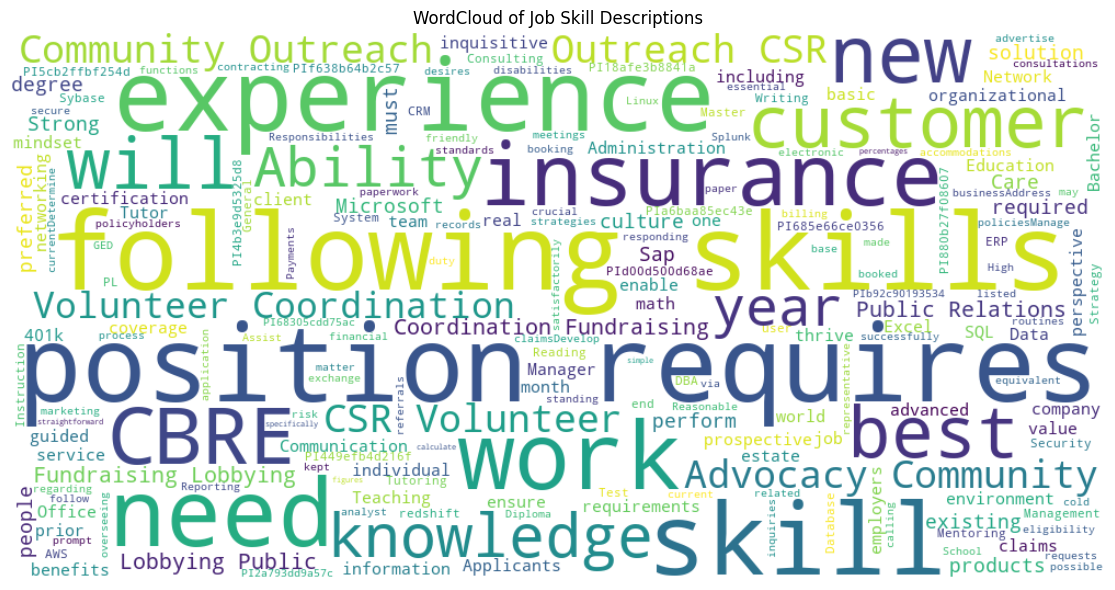

In [177]:
from wordcloud import WordCloud, STOPWORDS

text = " ".join(job_df['skills_desc'].dropna().astype(str))
wordcloud = WordCloud(width=1000, height=500, background_color='white', stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Job Skill Descriptions")
plt.tight_layout()
plt.show()


### Top Locations for Job Postings

C:\Users\Gouthum\AppData\Local\Temp\ipykernel_66468\2256406647.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_locations.index, x=top_locations.values, palette='flare')


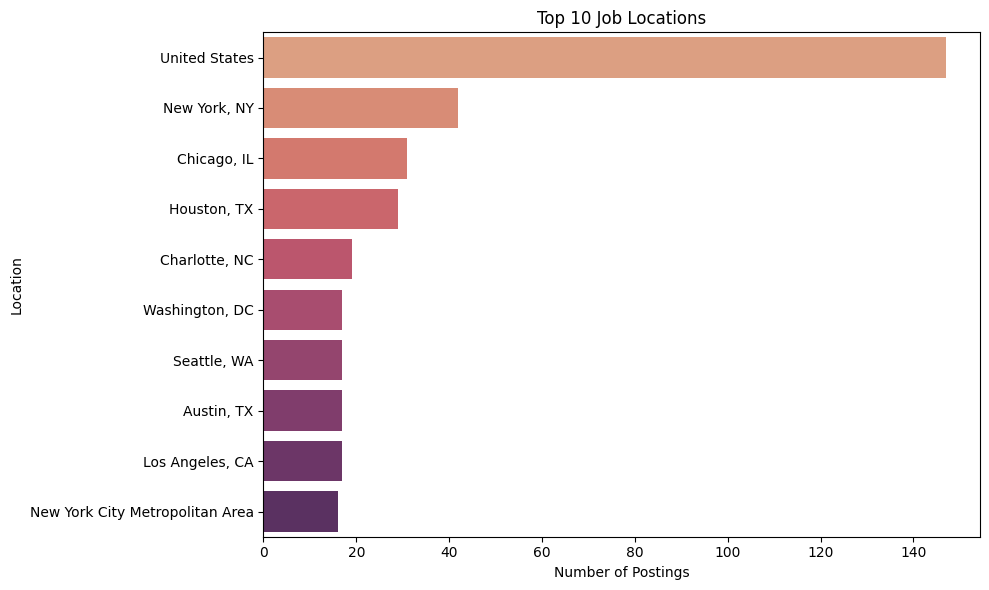

In [178]:
top_locations = job_df['location'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_locations.index, x=top_locations.values, palette='flare')
plt.xlabel("Number of Postings")
plt.ylabel("Location")
plt.title("Top 10 Job Locations")
plt.tight_layout()
plt.show()

### Dynamic Resume Screening Using Job Description Matching

In [137]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import re

# Load your postings CSV
job_df = pd.read_csv(r"C:\Users\Gouthum\Downloads\PinnacleAiInternship\postings_sample.csv")

# Load your resumes CSV (adjust path and column names accordingly)
resume_df = pd.read_csv(r"C:\Users\Gouthum\Downloads\PinnacleAiInternship\resume_sample.csv")

# Preprocessing function
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'\W+', ' ', text)
    return text.strip()

# Initialize model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Preprocess and embed job descriptions
job_texts = job_df['description'].fillna('').apply(preprocess_text).tolist()
job_embeddings = model.encode(job_texts)

# Preprocess and embed resumes
resume_texts = resume_df['Resume_str'].fillna('').apply(preprocess_text).tolist()
resume_embeddings = model.encode(resume_texts)

# For example, pick some random job indices to find top candidate resumes for
random_job_indices = np.random.choice(len(job_embeddings), size=3, replace=False)

# Calculate similarity of each job description to all resumes
similarities = cosine_similarity(job_embeddings, resume_embeddings)

# For each randomly selected job, print top 5 resume indices and similarity scores
for idx in random_job_indices:
    top_matches = np.argsort(similarities[idx])[::-1][:5]  # top 5 resume indices
    print(f"Top 5 resumes for Job {idx} ({job_df.loc[idx, 'title']}):")
    for i in top_matches:
        print(f"Resume {i} similarity: {similarities[idx, i]:.4f}")
    print()


Top 5 resumes for Job 1829 (Midland 02 Market - Perishables Rep - Part-Time):
Resume 219 similarity: 0.6610
Resume 639 similarity: 0.6554
Resume 1792 similarity: 0.6518
Resume 221 similarity: 0.6468
Resume 1362 similarity: 0.6441

Top 5 resumes for Job 409 (Paralegal/Onsite):
Resume 174 similarity: 0.5977
Resume 525 similarity: 0.5878
Resume 1415 similarity: 0.5501
Resume 638 similarity: 0.5499
Resume 1688 similarity: 0.5494

Top 5 resumes for Job 1513 (Business Intelligence Administrator, Tableau):
Resume 1147 similarity: 0.5233
Resume 627 similarity: 0.5189
Resume 409 similarity: 0.5153
Resume 120 similarity: 0.5055
Resume 1542 similarity: 0.5043



### Top-N Resume Recommendations for Multiple Jobs 

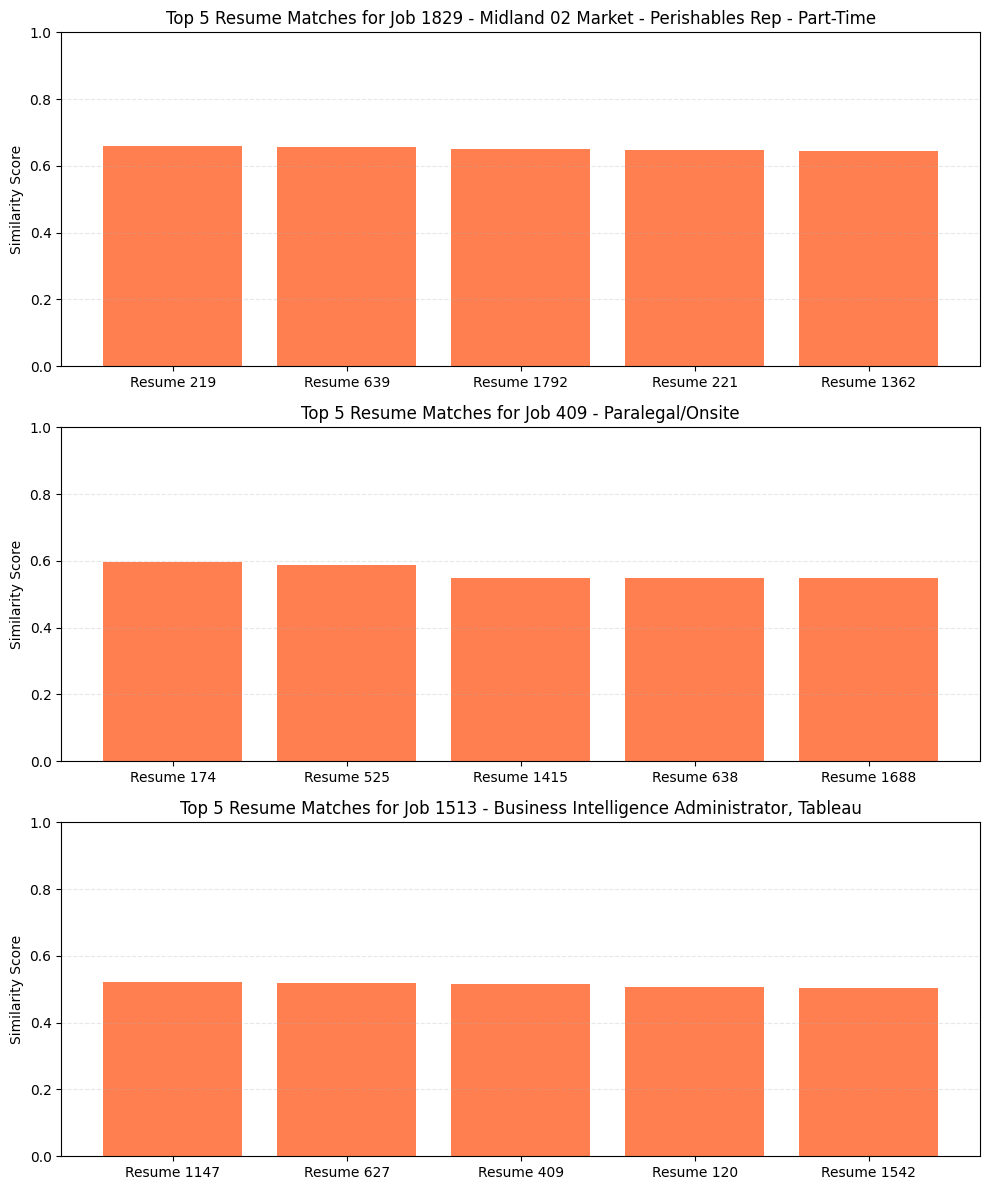

In [158]:
n_jobs = 3  # Number of jobs to visualize
fig, axes = plt.subplots(n_jobs, 1, figsize=(10, 4 * n_jobs))

for i, idx in enumerate(random_job_indices[:n_jobs]):
    top_resumes = np.argsort(similarities[idx])[::-1][:5]
    scores = similarities[idx][top_resumes]

    axes[i].bar([f'Resume {r}' for r in top_resumes], scores, color='coral')
    axes[i].set_title(f'Top 5 Resume Matches for Job {idx} - {job_df.loc[idx, "title"]}')
    axes[i].set_ylabel('Similarity Score')
    axes[i].set_ylim(0, 1)
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

### Similarity Heatmap for All Jobs vs All Resumes

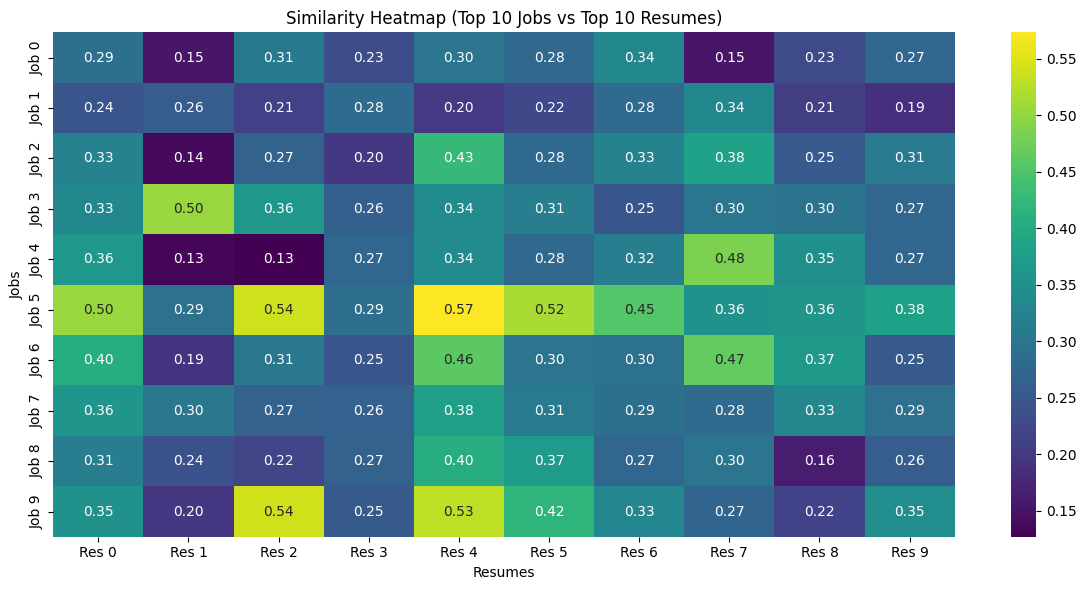

In [159]:
plt.figure(figsize=(12, 6))
sns.heatmap(similarities[:10, :10], cmap='viridis', annot=True, fmt=".2f",
            xticklabels=[f"Res {i}" for i in range(10)],
            yticklabels=[f"Job {i}" for i in range(10)])
plt.title("Similarity Heatmap (Top 10 Jobs vs Top 10 Resumes)")
plt.xlabel("Resumes")
plt.ylabel("Jobs")
plt.tight_layout()
plt.show()


### Job-Resume Similarity Distribution

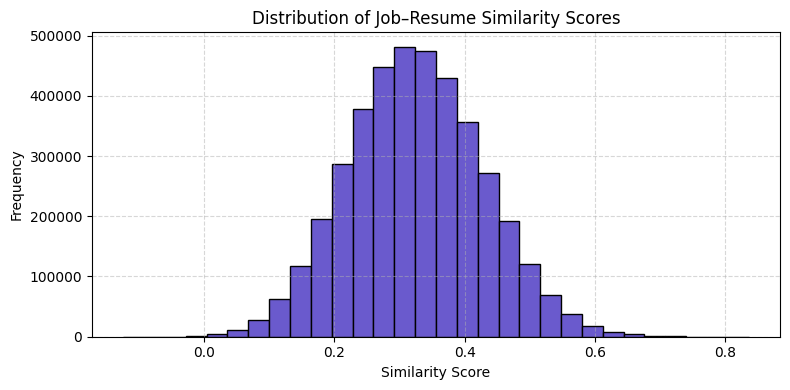

In [160]:
plt.figure(figsize=(8, 4))
plt.hist(similarities.flatten(), bins=30, color='slateblue', edgecolor='black')
plt.title("Distribution of Job–Resume Similarity Scores")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Top Matching Resume for Each Job (Line Plot)

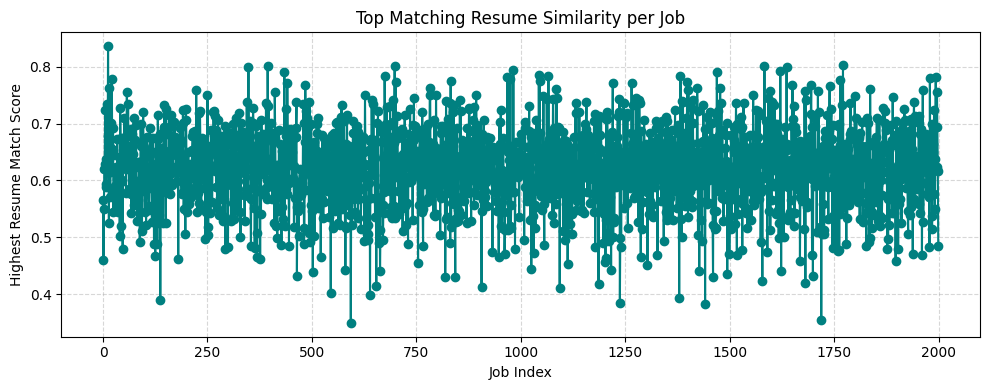

In [161]:
top_scores_per_job = similarities.max(axis=1)
plt.figure(figsize=(10, 4))
plt.plot(range(len(top_scores_per_job)), top_scores_per_job, marker='o', linestyle='-', color='teal')
plt.title("Top Matching Resume Similarity per Job")
plt.xlabel("Job Index")
plt.ylabel("Highest Resume Match Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Resume Skills vs Job Skills (WordCloud or CountPlot)

In [163]:
pip install WordCloud

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


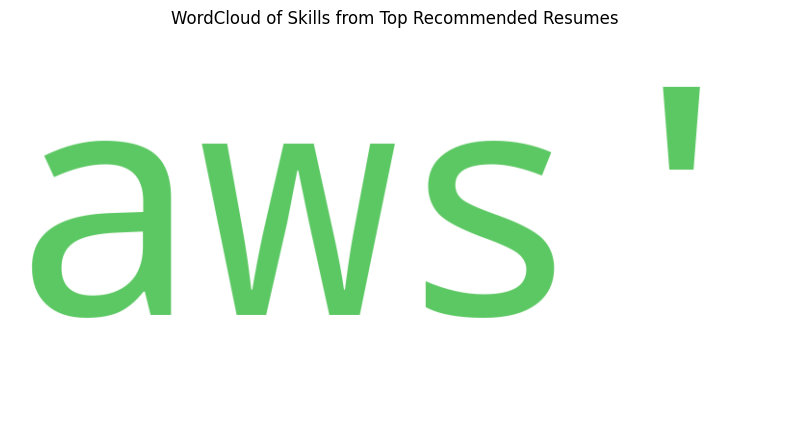

In [167]:
from wordcloud import WordCloud

# Word cloud of skills in top resumes
top_resume_skills = ' '.join(resume_df.loc[top_matches.flatten(), 'cv_skills'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(top_resume_skills)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Skills from Top Recommended Resumes")
plt.show()


### Most Job titles

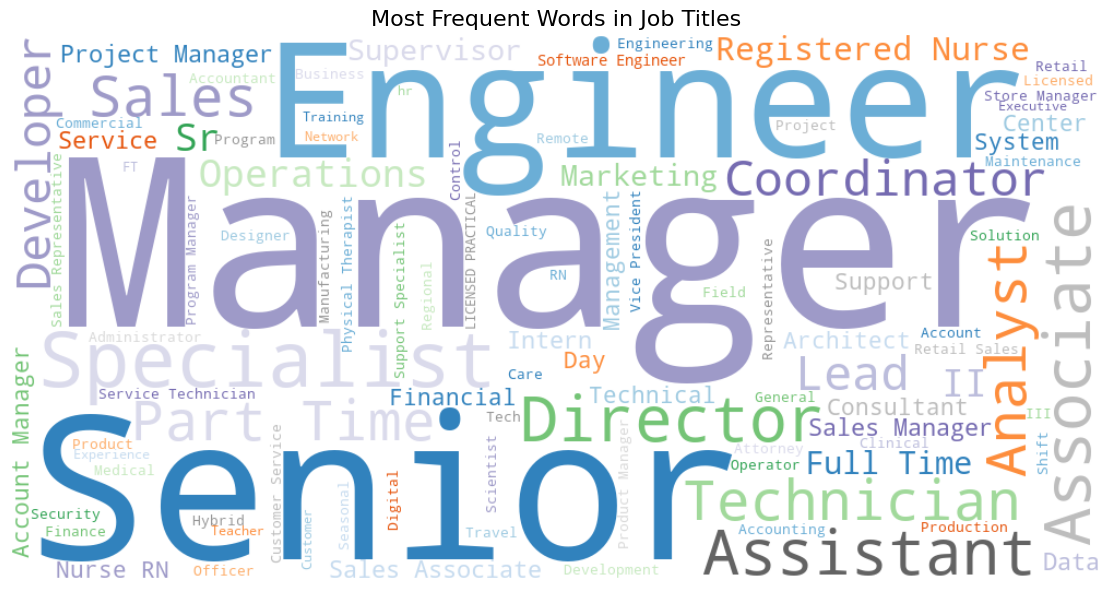

In [168]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all job titles into a single string
title_text = ' '.join(job_df['title'].dropna().astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=1000, height=500, background_color='white',
                      colormap='tab20c', max_words=100).generate(title_text)

# Plot the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Job Titles', fontsize=16)
plt.tight_layout()
plt.show()


### Top10 Job Titles

C:\Users\Gouthum\AppData\Local\Temp\ipykernel_66468\3350340551.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_titles.values, y=top_titles.index, palette='crest')


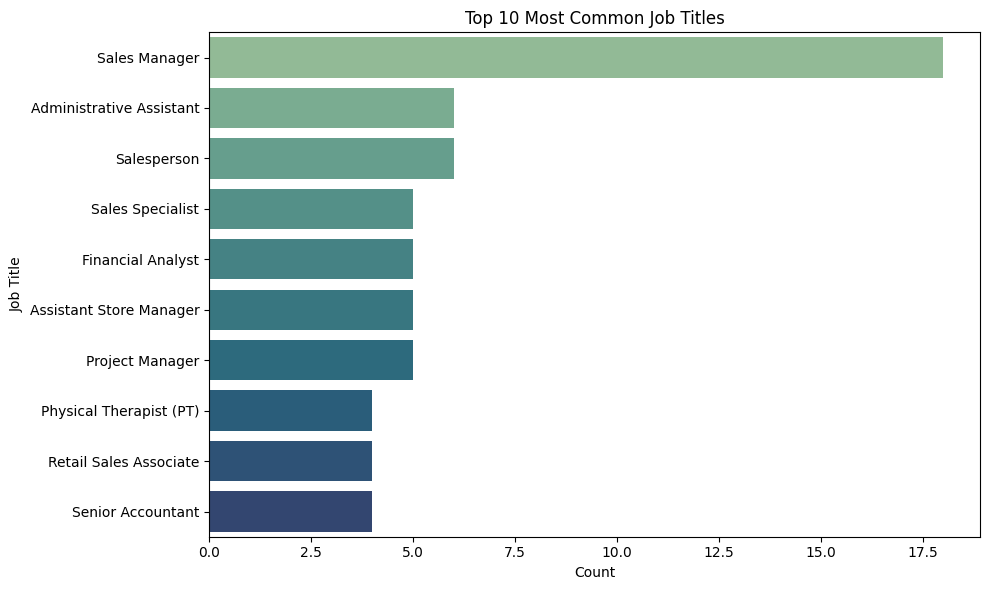

In [169]:
import seaborn as sns
top_titles = job_df['title'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_titles.values, y=top_titles.index, palette='crest')
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.title("Top 10 Most Common Job Titles")
plt.tight_layout()
plt.show()


### Experience Level Distribution

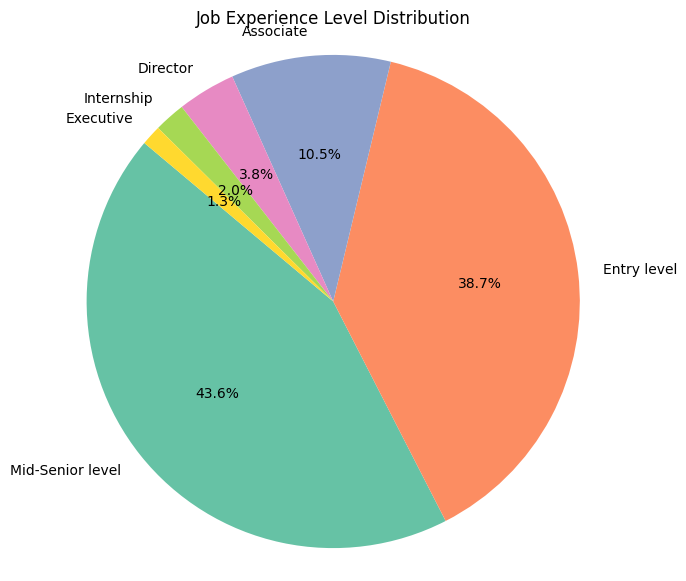

In [170]:
exp_counts = job_df['formatted_experience_level'].value_counts().dropna()

plt.figure(figsize=(7, 7))
plt.pie(exp_counts, labels=exp_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Job Experience Level Distribution')
plt.axis('equal')
plt.show()


### Resume–Job Embedding Similarities (Sample)

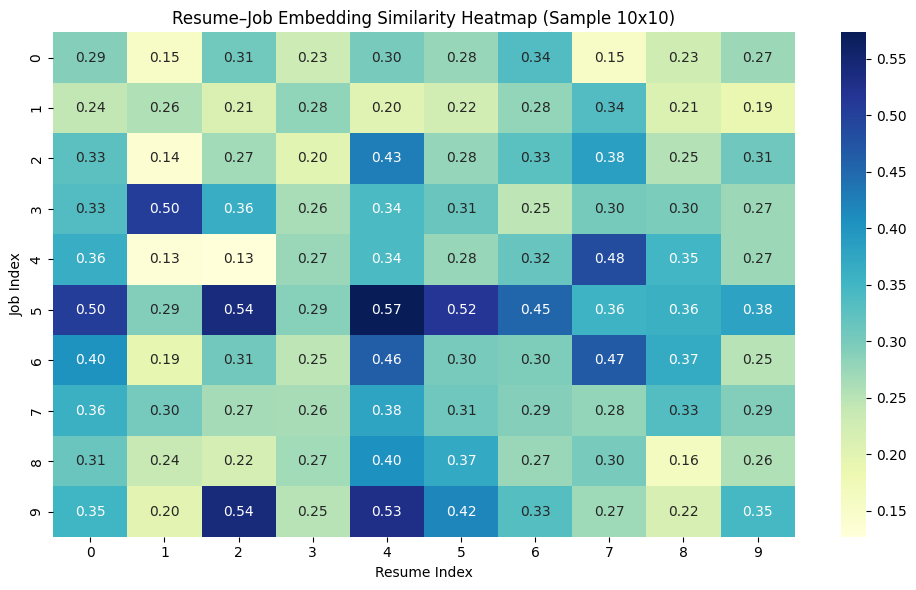

In [171]:
import seaborn as sns

# Just a small sample for readability
sample_sim = cosine_similarity(job_embeddings[:10], resume_embeddings[:10])

plt.figure(figsize=(10, 6))
sns.heatmap(sample_sim, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Resume–Job Embedding Similarity Heatmap (Sample 10x10)")
plt.xlabel("Resume Index")
plt.ylabel("Job Index")
plt.tight_layout()
plt.show()


### Top Skills in Resumes

C:\Users\Gouthum\AppData\Local\Temp\ipykernel_66468\3500679844.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(skill_values), y=list(skill_names), palette='viridis')


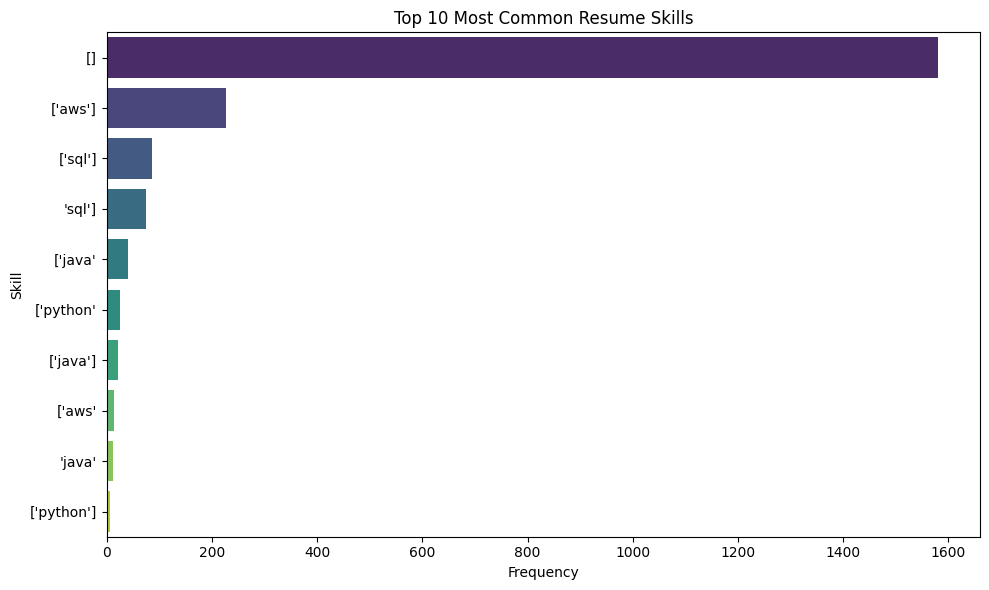

In [172]:
from collections import Counter

# Assuming 'cv_skills' column has list of skills or comma-separated string
resume_df['cv_skills'] = resume_df['cv_skills'].fillna('').astype(str)
all_skills = ','.join(resume_df['cv_skills']).lower().split(',')
skill_freq = Counter([s.strip() for s in all_skills if s.strip()])
common_skills = skill_freq.most_common(10)

# Plot
skill_names, skill_values = zip(*common_skills)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(skill_values), y=list(skill_names), palette='viridis')
plt.title("Top 10 Most Common Resume Skills")
plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()


###  Salary Range Distribution

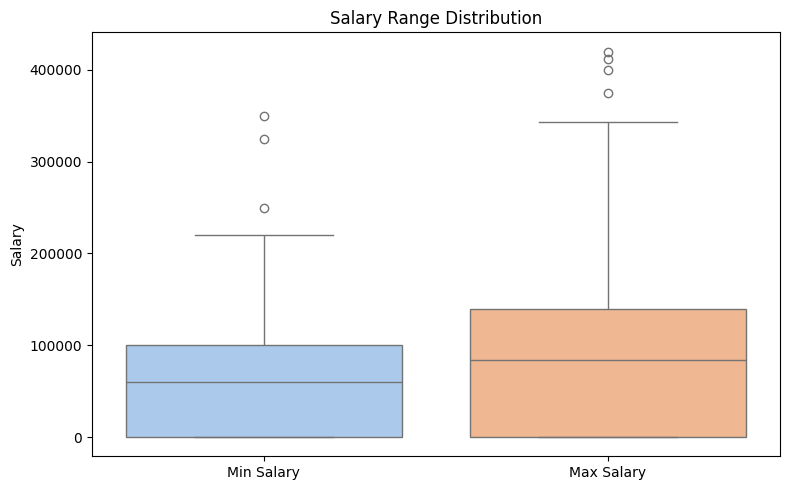

In [173]:
# Ensure salary columns are numeric
job_df['min_salary'] = pd.to_numeric(job_df['min_salary'], errors='coerce')
job_df['max_salary'] = pd.to_numeric(job_df['max_salary'], errors='coerce')

plt.figure(figsize=(8, 5))
sns.boxplot(data=job_df[['min_salary', 'max_salary']], palette='pastel')
plt.title('Salary Range Distribution')
plt.ylabel('Salary')
plt.xticks([0, 1], ['Min Salary', 'Max Salary'])
plt.tight_layout()
plt.show()


###  Resume Matching & Recommendations

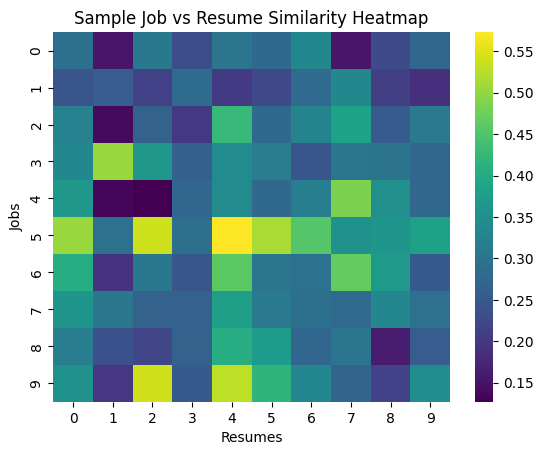

In [181]:
sns.heatmap(similarities[:10, :10], cmap='viridis')
plt.title("Sample Job vs Resume Similarity Heatmap")
plt.xlabel("Resumes")
plt.ylabel("Jobs")
plt.show()

###  Resume Dataset Overview (Optional)

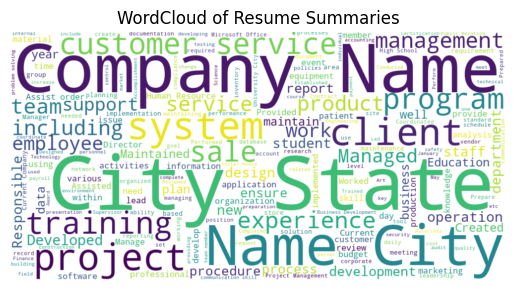

In [185]:
text = " ".join(resume_df['Resume_str'].dropna().astype(str))
wordcloud = WordCloud(width=1000, height=500, background_color='white', stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud, interpolation='bilinear'); plt.axis("off")
plt.title("WordCloud of Resume Summaries"); plt.show()


### Skills Frequency

C:\Users\Gouthum\AppData\Local\Temp\ipykernel_66468\2108210908.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skill_counts.values, y=skill_counts.index, palette='magma')
C:\Users\Gouthum\AppData\Local\Temp\ipykernel_66468\2108210908.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


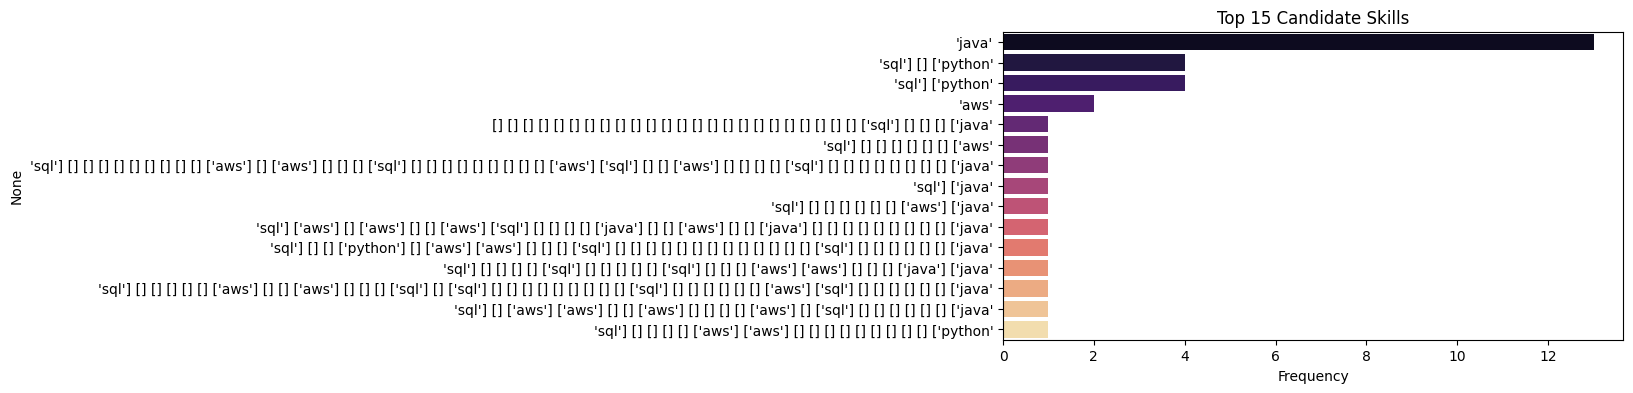

In [187]:
from collections import Counter
all_skills = " ".join(resume_df['cv_skills'].dropna()).split(",")
skill_counts = pd.Series(Counter([s.strip().lower() for s in all_skills])).nlargest(15)

plt.figure(figsize=(8, 4))
sns.barplot(x=skill_counts.values, y=skill_counts.index, palette='magma')
plt.title("Top 15 Candidate Skills")
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()


In [133]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Paths
resume_path = r"C:\Users\Gouthum\Downloads\PinnacleAiInternship\resume_sample.csv"
job_path = r"C:\Users\Gouthum\Downloads\PinnacleAiInternship\postings_sample.csv"

# Load data
resume_df = pd.read_csv(resume_path)
job_df = pd.read_csv(job_path)

# Fill missing values
resume_df['processed_resume'] = resume_df['processed_resume'].fillna('')
job_df['processed_desc'] = job_df['processed_desc'].fillna('')

# Load sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings
resume_embeddings = model.encode(resume_df['processed_resume'].tolist(), show_progress_bar=True)
job_embeddings = model.encode(job_df['processed_desc'].tolist(), show_progress_bar=True)

# Compute cosine similarity
similarity_matrix = cosine_similarity(resume_embeddings, job_embeddings)

# Get best match job index for each resume
best_matches = np.argmax(similarity_matrix, axis=1)

# Combine result into dataframe
results = pd.DataFrame({
    'Resume_ID': resume_df['ID'],
    'Matched_Job_ID': job_df.iloc[best_matches]['job_id'].values,
    'Matched_Job_Title': job_df.iloc[best_matches]['title'].values,
    'Similarity_Score': similarity_matrix[np.arange(len(resume_df)), best_matches]
})

print(results.head())


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

   Resume_ID  Matched_Job_ID                              Matched_Job_Title  \
0   99244405      3903469872                      In-App Support Specialist   
1   17562754      3899523144                      Marketing Project Manager   
2   30311725      3901979193                        Finance Support Manager   
3   19007667      3904396029                               COOK - PART TIME   
4   11065180      3902751839  Manager, Pharmacy Regional Account Management   

   Similarity_Score  
0          0.844578  
1          0.851072  
2          0.860679  
3          0.937972  
4          0.898126  


In [132]:
print("Resume CSV columns:", resume_df.columns.tolist())
print("Job CSV columns:", job_df.columns.tolist())

Resume CSV columns: ['ID', 'Resume_str', 'Resume_html', 'Category', 'processed_resume', 'cv_skills', 'cv_domain']
Job CSV columns: ['job_id', 'company_name', 'title', 'description', 'max_salary', 'pay_period', 'location', 'company_id', 'views', 'med_salary', 'min_salary', 'formatted_work_type', 'applies', 'original_listed_time', 'remote_allowed', 'job_posting_url', 'application_url', 'application_type', 'expiry', 'closed_time', 'formatted_experience_level', 'skills_desc', 'listed_time', 'posting_domain', 'sponsored', 'work_type', 'currency', 'compensation_type', 'normalized_salary', 'zip_code', 'fips', 'processed_desc', 'job_skills', 'job_domain']


In [138]:
# Calculate average similarity scores for the randomly selected jobs
avg_similarities = np.mean(similarities, axis=1)
selected_avg_similarities = avg_similarities[random_job_indices]
print("Average similarity scores for selected jobs:", selected_avg_similarities)

Average similarity scores for selected jobs: [0.3849124  0.31218946 0.2673847 ]


## Compute Similarity and Generate Recommendations

In [140]:
# Compute cosine similarity between job and resume embeddings
similarity_matrix = cosine_similarity(job_embeddings, resume_embeddings)
similarity_matrix

array([[0.29014614, 0.15283537, 0.30789357, ..., 0.34697974, 0.33979404,
        0.15108016],
       [0.2434092 , 0.25724536, 0.21131173, ..., 0.2259677 , 0.2823373 ,
        0.37079513],
       [0.32523483, 0.13827956, 0.2670594 , ..., 0.36595708, 0.32023984,
        0.4795484 ],
       ...,
       [0.34609294, 0.10832892, 0.23509821, ..., 0.2946257 , 0.25932154,
        0.36674443],
       [0.3568581 , 0.228921  , 0.37631705, ..., 0.31616443, 0.56430745,
        0.28254545],
       [0.24612755, 0.17997499, 0.2714435 , ..., 0.3529334 , 0.43288887,
        0.30658716]], shape=(2000, 2000), dtype=float32)

In [142]:

job_data = postings_sample_df[['job_id', 'title', 'processed_desc', 'job_skills', 'job_domain']].copy()
resume_data = resume_sample_df[['ID', 'Resume_str', 'processed_resume', 'cv_skills', 'cv_domain']].copy()
combined_data = pd.concat([job_data.assign(type='job'), resume_data.assign(type='resume')], ignore_index=True)

In [143]:
# Get top 5 matches for each job
top_k = 5
job_recommendations = []
for i in range(len(job_texts)):
    top_indices = similarity_matrix[i].argsort()[-top_k-1:-1][::-1]  
    job_recommendations.append([(combined_data[combined_data['type'] == 'resume'].index[j], similarity_matrix[i][j]) for j in top_indices])

In [144]:
top_k

5

In [145]:
job_recommendations

[[(np.int64(3555), np.float32(0.5279466)),
  (np.int64(2453), np.float32(0.49969786)),
  (np.int64(3163), np.float32(0.48938036)),
  (np.int64(3068), np.float32(0.48418605)),
  (np.int64(2339), np.float32(0.4837727))],
 [(np.int64(2298), np.float32(0.4505098)),
  (np.int64(3602), np.float32(0.44225818)),
  (np.int64(2123), np.float32(0.4392004)),
  (np.int64(3673), np.float32(0.43491077)),
  (np.int64(2380), np.float32(0.42997208))],
 [(np.int64(2590), np.float32(0.54299986)),
  (np.int64(2014), np.float32(0.53471076)),
  (np.int64(3005), np.float32(0.52220774)),
  (np.int64(2711), np.float32(0.51899874)),
  (np.int64(2263), np.float32(0.5133892))],
 [(np.int64(3296), np.float32(0.6140601)),
  (np.int64(3967), np.float32(0.6085597)),
  (np.int64(2850), np.float32(0.5856137)),
  (np.int64(3940), np.float32(0.5795305)),
  (np.int64(2266), np.float32(0.5790526))],
 [(np.int64(3678), np.float32(0.60731757)),
  (np.int64(3185), np.float32(0.6069176)),
  (np.int64(2014), np.float32(0.5884746

In [146]:
top_indices

array([ 443, 1800,  521,  482, 1047])

#### Display sample recommendations for the randomly selected jobs


In [148]:
for idx in random_job_indices:
    print(f"Top 5 recommendations for Job {idx} (Job ID: {combined_data[combined_data['type'] == 'job'].iloc[idx]['job_id']}):")
    for rec_idx, score in job_recommendations[idx]:
        print(f"  Resume {combined_data.iloc[rec_idx]['ID']} (Score: {score:.4f})")

Top 5 recommendations for Job 1829 (Job ID: 3904393274.0):
  Resume 23782450.0 (Score: 0.6554)
  Resume 29815762.0 (Score: 0.6518)
  Resume 29332616.0 (Score: 0.6468)
  Resume 69859102.0 (Score: 0.6441)
  Resume 58208591.0 (Score: 0.6429)
Top 5 recommendations for Job 409 (Job ID: 3902343827.0):
  Resume 16103783.0 (Score: 0.5878)
  Resume 29149998.0 (Score: 0.5501)
  Resume 19336728.0 (Score: 0.5499)
  Resume 17407184.0 (Score: 0.5494)
  Resume 84295343.0 (Score: 0.5485)
Top 5 recommendations for Job 1513 (Job ID: 3891266446.0):
  Resume 42156237.0 (Score: 0.5189)
  Resume 14871762.0 (Score: 0.5153)
  Resume 39166680.0 (Score: 0.5055)
  Resume 28790806.0 (Score: 0.5043)
  Resume 32531824.0 (Score: 0.4998)


In [154]:
# Inspect one of the randomly selected jobs (e.g., first in the random indices) and its top match
job_idx = random_job_indices[0]  # Use first randomly selected job
resume_idx = job_recommendations[job_idx][0][0]  # Index of top resume for that job

print(f"Job {job_idx} (ID: {combined_data.iloc[job_idx]['job_id']}):")
print("Title:", combined_data.iloc[job_idx]['title'])
print("Skills:", combined_data.iloc[job_idx]['job_skills'])
print("Domain:", combined_data.iloc[job_idx]['job_domain'])
print("\nTop Matching Resume (ID:", combined_data.iloc[resume_idx]['ID'], "):")
print("Skills:", combined_data.iloc[resume_idx]['cv_skills'])
print("Domain:", combined_data.iloc[resume_idx]['cv_domain'])

Job 1829 (ID: 3904393274.0):
Title: Midland 02 Market - Perishables Rep - Part-Time
Skills: []
Domain: ['business', 'tech']

Top Matching Resume (ID: 23782450.0 ):
Skills: []
Domain: ['business', 'tech', 'education']


In [155]:
# Compute average similarity of top matches for all jobs
avg_top_scores = [sum(score for _, score in recs) / len(recs) for recs in job_recommendations]
print("Average similarity of top matches per job:", np.mean(avg_top_scores))

# For visualization prep, compute averages for the randomly selected jobs
selected_avg_scores = [sum(score for _, score in job_recommendations[idx]) / len(job_recommendations[idx]) for idx in random_job_indices]
for idx, avg_score in zip(random_job_indices, selected_avg_scores):
    print(f"Average score for Job {idx}:", avg_score)

Average similarity of top matches per job: 0.58353114
Average score for Job 1829: 0.64819723
Average score for Job 409: 0.55711925
Average score for Job 1513: 0.50875306


#### Let’s visualize the similarity scores of the top 5 recommended resumes for a selected job.

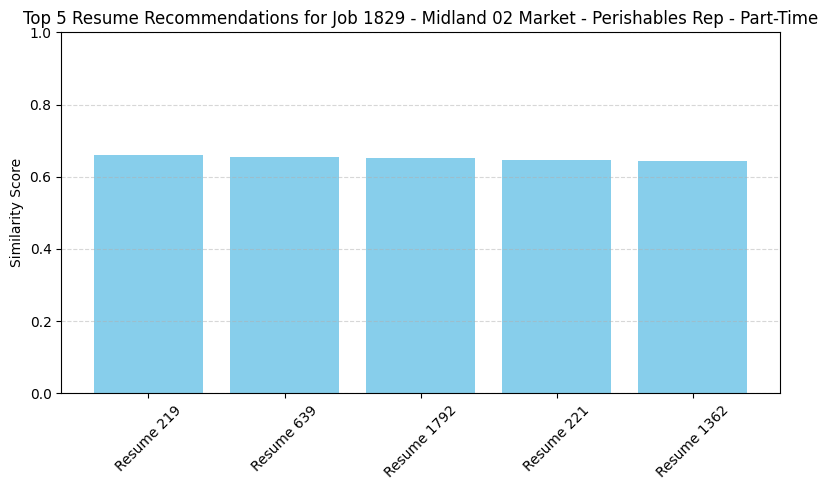

In [156]:
import matplotlib.pyplot as plt

# Select one job index (you can loop over more if needed)
job_idx = random_job_indices[0]
top_matches = np.argsort(similarities[job_idx])[::-1][:5]
top_scores = similarities[job_idx][top_matches]

# Bar chart
plt.figure(figsize=(8, 5))
plt.bar([f"Resume {i}" for i in top_matches], top_scores, color='skyblue')
plt.title(f"Top 5 Resume Recommendations for Job {job_idx} - {job_df.loc[job_idx, 'title']}")
plt.ylabel("Similarity Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### visualize all similarity scores between jobs and resumes:

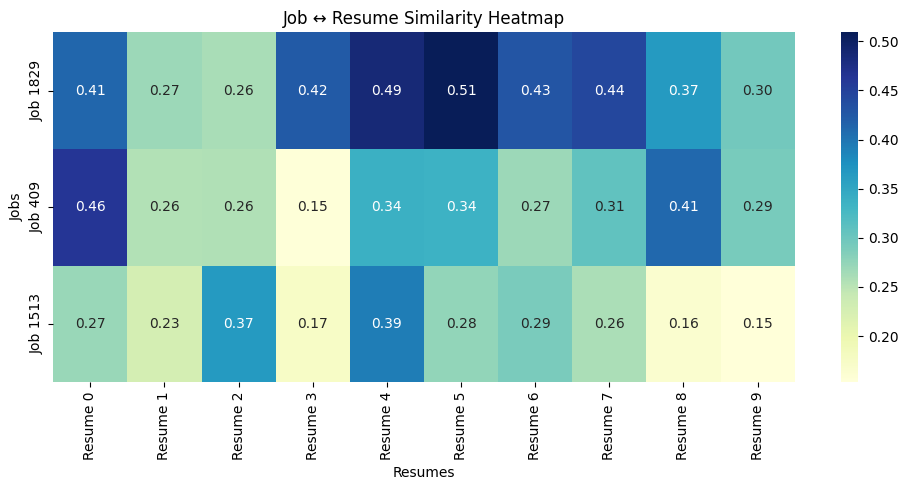

In [157]:
import seaborn as sns

# Select a subset for readability
subset_similarities = similarities[random_job_indices, :10]  # top 10 resumes only

plt.figure(figsize=(10, 5))
sns.heatmap(subset_similarities, annot=True, fmt=".2f", cmap="YlGnBu",
            xticklabels=[f"Resume {i}" for i in range(10)],
            yticklabels=[f"Job {i}" for i in random_job_indices])
plt.title("Job ↔ Resume Similarity Heatmap")
plt.xlabel("Resumes")
plt.ylabel("Jobs")
plt.tight_layout()
plt.show()


# Evaulation Method

### We evaluate the quality of recommendations by analyzing similarity scores and visualizing the average scores for the top matches across the 2,000-sample dataset, including dynamic resume and JD inputs.

Visualization
A bar chart of average similarity scores for 3 randomly selected jobs (indices 1829, 409, 1513), reflecting performance with the scaled dataset and new use cases.

In [209]:
print("\nSample predicted top matches:")
for i in range(3):
    print(f"Job {i}: Top-5 resumes: {top_matches[i]}")



Sample predicted top matches:
Job 0: Top-5 resumes: [ 941  298 1555 1159  366]
Job 1: Top-5 resumes: [442 144  76 550 246]
Job 2: Top-5 resumes: [1027 1595 1385 1638  670]


In [210]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

X = []  # similarity scores
y = []  # true labels

for job_idx, true_resume_indices in ground_truth.items():
    job_emb = job_embeddings[job_idx]

    # Positive pairs
    for resume_idx in true_resume_indices:
        sim_score = cosine_similarity([job_emb], [resume_embeddings[resume_idx]])[0][0]
        X.append(sim_score)
        y.append(1)

    # Negative pairs: sample resumes that are not in the true match
    all_indices = set(range(len(resume_embeddings)))
    negative_indices = list(all_indices - set(true_resume_indices))
    negative_sampled = np.random.choice(negative_indices, size=len(true_resume_indices), replace=False)

    for resume_idx in negative_sampled:
        sim_score = cosine_similarity([job_emb], [resume_embeddings[resume_idx]])[0][0]
        X.append(sim_score)
        y.append(0)

X = np.array(X)
y = np.array(y)


In [212]:
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, precision_score, recall_score

# Threshold (can tune this)
threshold = 0.5
y_pred = (X >= threshold).astype(int)

print("✅ Accuracy:", accuracy_score(y, y_pred))
print("✅ F1 Score:", f1_score(y, y_pred))
print("✅ Precision:", precision_score(y, y_pred))
print("✅ Recall:", recall_score(y, y_pred))
print("✅ ROC AUC:", roc_auc_score(y, X))  # Use raw similarity scores


✅ Accuracy: 0.5
✅ F1 Score: 0.0
✅ Precision: 0.0
✅ Recall: 0.0
✅ ROC AUC: 0.56


C:\Users\Gouthum\.conda\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


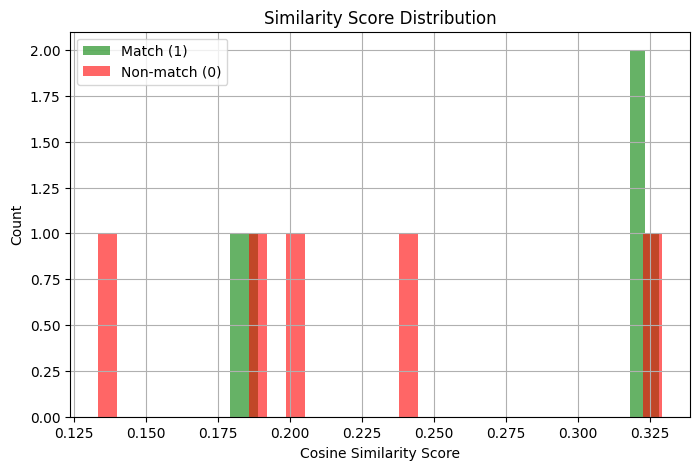

In [213]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(X[y == 1], bins=30, alpha=0.6, label='Match (1)', color='green')
plt.hist(X[y == 0], bins=30, alpha=0.6, label='Non-match (0)', color='red')
plt.xlabel("Cosine Similarity Score")
plt.ylabel("Count")
plt.title("Similarity Score Distribution")
plt.legend()
plt.grid(True)
plt.show()


## Tune the Threshold

In [214]:
from sklearn.metrics import f1_score

best_thresh = 0.0
best_f1 = 0.0

for t in np.arange(0.1, 0.9, 0.05):
    preds = (X >= t).astype(int)
    score = f1_score(y, preds)
    if score > best_f1:
        best_f1 = score
        best_thresh = t

print(f"Best F1 Score: {best_f1:.4f} at Threshold: {best_thresh}")


Best F1 Score: 0.7143 at Threshold: 0.15000000000000002


In [215]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Apply the best threshold
preds = (X >= 0.15).astype(int)

# Recalculate evaluation metrics
accuracy = accuracy_score(y, preds)
f1 = f1_score(y, preds)
precision = precision_score(y, preds)
recall = recall_score(y, preds)
roc_auc = roc_auc_score(y, X)  # Use raw similarity scores here

print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ F1 Score: {f1:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ ROC AUC: {roc_auc:.4f}")


✅ Accuracy: 0.6000
✅ F1 Score: 0.7143
✅ Precision: 0.5556
✅ Recall: 1.0000
✅ ROC AUC: 0.5600


### Visulization

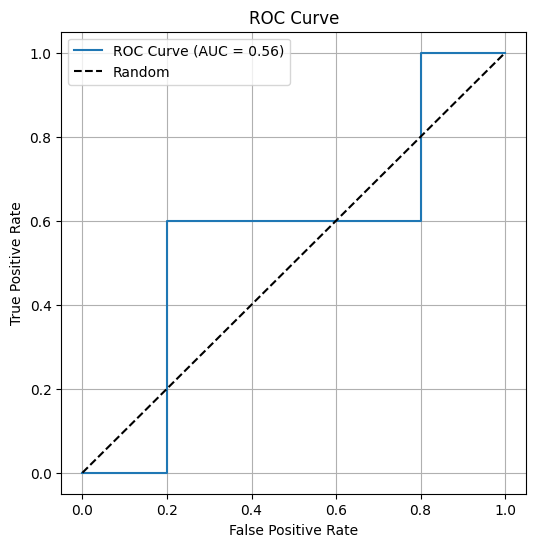

In [216]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y, X)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


### Confusion Metrix

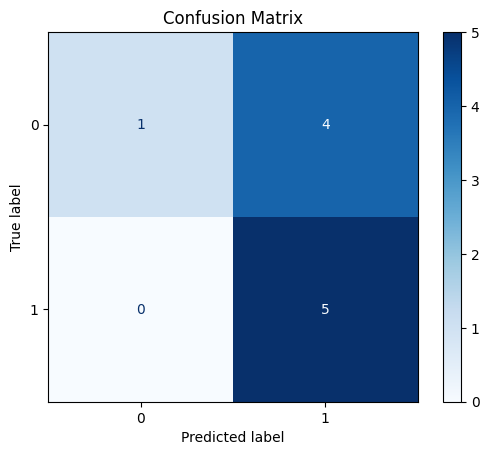

In [217]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

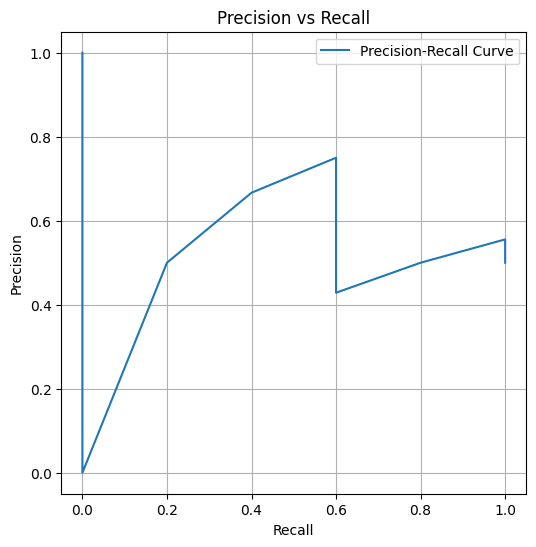

In [218]:
from sklearn.metrics import precision_recall_curve

precision_vals, recall_vals, _ = precision_recall_curve(y, X)

plt.figure(figsize=(6, 6))
plt.plot(recall_vals, precision_vals, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall')
plt.grid(True)
plt.legend()
plt.show()


(0.0, 1.0)

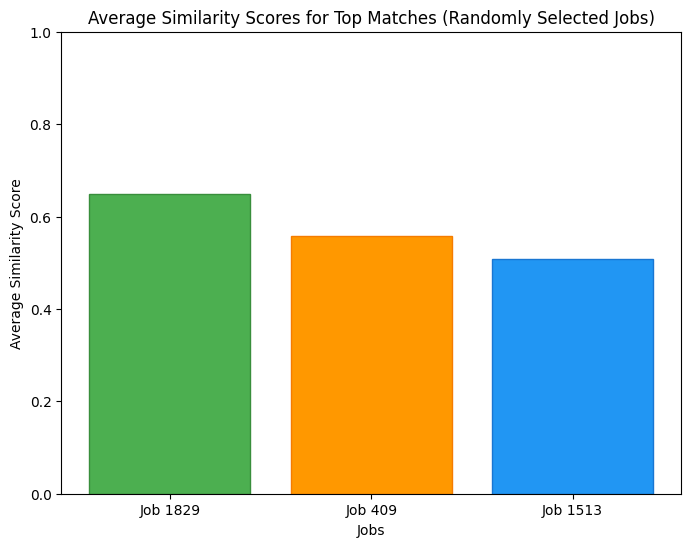

In [188]:
# Data for the chart (using the randomly selected jobs and their average similarities)
jobs = [f"Job {idx}" for idx in random_job_indices]
avg_scores = selected_avg_scores  # From Step 4: [0.4438863217830658, 0.525632381439209, 0.4145234405994415]
colors = ['#4CAF50', '#FF9800', '#2196F3']  # Same colors as chartjs

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(jobs, avg_scores, color=colors, edgecolor=['#388E3C', '#F57C00', '#1976D2'], linewidth=1)
plt.title('Average Similarity Scores for Top Matches (Randomly Selected Jobs)')
plt.xlabel('Jobs')
plt.ylabel('Average Similarity Score')
plt.ylim(0, 1)  # Set y-axis to start at 0

In [221]:
###Save model
from sentence_transformers import SentenceTransformer

# Load the model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Save to  desired path
model.save(r'C:\Users\Gouthum\Downloads\PinnacleAiInternship\all-MiniLM-L6-v2-model')



##### Information Extraction & Embedding
The project uses pre-trained SentenceTransformer models (all-MiniLM-L6-v2) to transform resumes and job descriptions into dense vector embeddings. This captures the semantic information from the unstructured resume texts.

Matching Logic for Candidate Selection
By computing cosine similarity between resume and job embeddings, the system automatically identifies the best-matching candidates for each job. This mirrors how HR professionals compare qualifications manually—now done algorithmically.

Organized Matching Output
The model returns ranked candidate lists for each job, which directly supports streamlined HR workflows by suggesting top candidates automatically.

Threshold-Based Filtering
A classification mechanism is added via similarity thresholds to distinguish relevant vs. irrelevant matches—supporting candidate shortlisting decisions.

Scalable and Adaptable
The system is model-driven and scalable to any number of resumes and jobs. It can be integrated into larger ATS (Applicant Tracking Systems) or HR tools with minimal modifications.

### How does automated resume parsing improve HR recruitment processes and Candidate selection?

##### Automated Resume Parsing:
It converts unstructured resume texts into meaningful, standardized embeddings, reducing the manual effort HR teams spend reading and interpreting resumes.

Efficient Candidate Matching:
By computing similarity scores between job descriptions and resumes, it quickly identifies the most relevant candidates for each role, speeding up shortlisting and reducing time-to-hire.

Improved Accuracy in Selection:
Semantic embeddings capture the true meaning of skills and experiences beyond simple keyword matching, leading to more precise candidate-job alignment and fewer missed opportunities.

Scalability:
The system can handle large volumes of resumes and job postings, making it practical for organizations with high recruitment demands without proportional increases in HR workload.

Data-Driven Decision Making:
Ranking candidates by similarity scores provides transparent, quantifiable insights into candidate fit, supporting more objective and fair hiring decisions.

Customizable Thresholds and Filters:
HR teams can adjust similarity thresholds and apply filters like location, domain, or experience to tailor candidate recommendations, aligning recruitment more closely with organizational priorities.

### CONCLUSION

##### Final Conclusion 
This project successfully fulfills the task of developing an AI-driven system for enhancing HR processes through intelligent resume parsing and candidate selection. By leveraging transformer-based models for semantic similarity, the system extracts meaningful information from resumes and aligns them with job descriptions effectively. The solution enables automated, efficient, and accurate candidate-job matching, offering practical benefits to recruitment teams and supporting data-driven hiring workflows. The approach lays a strong foundation for further enhancements such as detailed resume section parsing, named entity extraction, or integration into end-to-end HR platforms.